<a href="https://colab.research.google.com/github/rajdeepbanerjee-git/JNCLectures_Intro_to_ML/blob/main/Week1/Association_rule_mining_MBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import itertools

In [3]:
# get data
!wget https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv

--2023-12-26 04:27:07--  https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1103280 (1.1M) [text/plain]
Saving to: ‘Groceries_dataset.csv’

Groceries_dataset.c 100%[===================>]   1.05M  --.-KB/s    in 0.06s   

2023-12-26 04:27:07 (18.6 MB/s) - ‘Groceries_dataset.csv’ saved [1103280/1103280]



In [4]:
# read data
data = pd.read_csv("/content/Groceries_dataset.csv")
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
# total unique items
data['itemDescription'].nunique()

167

In [26]:
# saving all items and their freq of occurrence in a dictionary
item_freq = data['itemDescription'].value_counts().to_dict()
item_freq_df = pd.DataFrame(item_freq.items(), columns=['item', 'item_frequency'])
item_freq_df.head()

,item,item_frequency
0,whole milk,2502
1,other vegetables,1898
2,rolls/buns,1716
3,soda,1514
4,yogurt,1334


In [70]:
# total number of member id is the max number of times an item can be bought
num_occurrences = data['Member_number'].nunique()

# item individual probabilities
item_freq_df['item_probability'] = np.round(item_freq_df['item_frequency']/num_occurrences, 4)

item_freq_df.head()

,item,item_frequency,item_probability
0,whole milk,2502,0.6419
1,other vegetables,1898,0.4869
2,rolls/buns,1716,0.4402
3,soda,1514,0.3884
4,yogurt,1334,0.3422


In [72]:
# checking if max and min follow the axioms

if item_freq_df['item_probability'].max() <= 1 and item_freq_df['item_probability'].min() >= 0:
  print("follows axiomatic definition of probability")
else:
  print("probabilities out of bound")

follows axiomatic definition of probability


In [73]:
# to calculate how many times two items occur together, we need to calculate
# how many times a pair of items have the same member number

item_list = list(data['itemDescription'].unique())

# all possible combinations can be calculated using itertools module
item_pair_freq = []
for item1, item2 in itertools.combinations(item_list, 2):
  set1 = set(list(data[data['itemDescription'] ==  item1]['Member_number']))
  set2 = set(list(data[data['itemDescription'] == item2]['Member_number']))
  item_pair_freq.append({'item1': item1,'item2': item2, 'frequency': len(list(set1.intersection(set2)))})

item_pair_freq_df = pd.DataFrame(item_pair_freq)


In [74]:
item_pair_freq_df.head()

,item1,item2,frequency
0,tropical fruit,whole milk,454
1,tropical fruit,pip fruit,170
2,tropical fruit,other vegetables,356
3,tropical fruit,rolls/buns,344
4,tropical fruit,pot plants,34


In [75]:
# joint probability is the total number of times two items have co-occurred normalized by the total number of member id's
item_pair_freq_df['joint_probability'] = np.round(item_pair_freq_df['frequency']/num_occurrences, 4)

item_pair_freq_df.head()

,item1,item2,frequency,joint_probability
0,tropical fruit,whole milk,454,0.1165
1,tropical fruit,pip fruit,170,0.0436
2,tropical fruit,other vegetables,356,0.0913
3,tropical fruit,rolls/buns,344,0.0883
4,tropical fruit,pot plants,34,0.0087


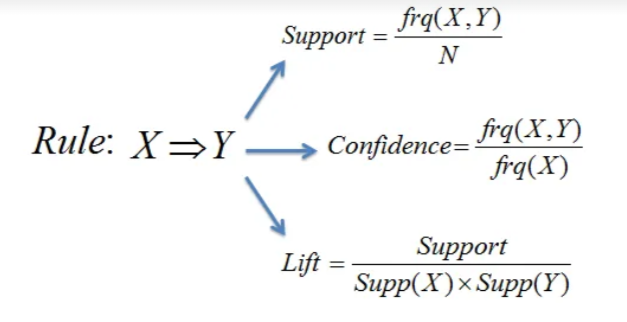

In [78]:
# given item1, item2 calculate the following metrics:

def association_rule_metrics(item1: str, item2: str):

  # support is nothing but the joint probability
  support = item_pair_freq_df[(item_pair_freq_df['item1'] == item1) &
                              (item_pair_freq_df['item2'] == item2)]['joint_probability'].values

  # confidence is nothing but the conditional probability
  confidence_item1_given_item2 = np.round(item_pair_freq_df[(item_pair_freq_df['item1'] == item1) &
                              (item_pair_freq_df['item2'] == item2)]['joint_probability'].values \
                              /item_freq_df[item_freq_df['item'] == item2]['item_probability'].values, 4)

  confidence_item2_given_item1 = np.round(item_pair_freq_df[(item_pair_freq_df['item1'] == item1) &
                              (item_pair_freq_df['item2'] == item2)]['joint_probability'].values \
                              /item_freq_df[item_freq_df['item'] == item1]['item_probability'].values, 4)

  # lift = joint probability/ product of individual probabilities
  lift = np.round(item_pair_freq_df[(item_pair_freq_df['item1'] == item1) &
                              (item_pair_freq_df['item2'] == item2)]['joint_probability'].values \
                              /item_freq_df[item_freq_df['item'] == item1]['item_probability'].values \
                              *item_freq_df[item_freq_df['item'] == item2]['item_probability'].values, 4)


  return support.item(), confidence_item1_given_item2.item(), confidence_item2_given_item1.item(), lift.item()


In [60]:
print(item_list)

['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables', 'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter', 'chicken', 'butter', 'fruit/vegetable juice', 'packaged fruit/vegetables', 'chocolate', 'specialty bar', 'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread', 'hamburger meat', 'root vegetables', 'pork', 'pastry', 'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham', 'turkey', 'curd cheese', 'red/blush wine', 'frozen potato products', 'flour', 'sugar', 'frozen meals', 'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish', 'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn', 'finished products', 'beverages', 'bottled beer', 'dessert', 'dog food', 'specialty chocolate', 'condensed milk', 'cleaner', 'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ', 'liquor', 'pickled vegetables', 'liquor (appetizer)', 'UHT-milk', 'candy', 'onions', 'hair spray', 'photo/film', 'domestic eggs', 'margarine', 'shopping b

In [79]:
item1 = input("Please provide item1: ")
item2 = input("Please provide item2: ")
print("calculating metrics")
support, confidence_item1_given_item2, confidence_item2_given_item1, lift = association_rule_metrics('whole milk', 'rolls/buns')
print(f"Here are the metrics:\n support: {support}, \n \
confidence_item1_given_item2: {confidence_item1_given_item2}, \n \
confidence_item2_given_item1: {confidence_item2_given_item1}, \n \
lift: {lift}")

Please provide item1: citrus fruit
Please provide item2: chicken
calculating metrics
Here are the metrics:
 support: 0.1786, 
 confidence_item1_given_item2: 0.4057, 
 confidence_item2_given_item1: 0.2782, 
 lift: 0.1225


In [92]:
# apply the above created function to generate metrics for all the combinations

# tqdm is a library to help see progress of the job i.e. time it properly
tqdm.pandas()

# Note, instead of apply we are using progress_apply() to generate the progress
results_df[['support', 'confidence_item1_given_item2', 'confidence_item2_given_item1', 'lift']] \
= results_df.progress_apply(lambda x: association_rule_metrics(x['item1'], x['item2']), axis =1, result_type='expand')

100%|██████████| 13861/13861 [01:59<00:00, 116.03it/s]


In [93]:
results_df.head()

,item1,item2,frequency,joint_probability,support,confidence_item1_given_item2,confidence_item2_given_item1,lift
0,tropical fruit,whole milk,454,0.1165,0.1165,0.1815,0.4400,0.2824
1,tropical fruit,pip fruit,170,0.0436,0.0436,0.2284,0.1647,0.0314
2,tropical fruit,other vegetables,356,0.0913,0.0913,0.1875,0.3448,0.1679
3,tropical fruit,rolls/buns,344,0.0883,0.0883,0.2006,0.3335,0.1468
4,tropical fruit,pot plants,34,0.0087,0.0087,0.2871,0.0329,0.0010
